In [50]:
import pandas as pd
import numpy as np
from pandas_datareader import data as wb
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.seasonal import STL
from statsmodels.tsa.stattools import adfuller
from matplotlib.pylab import rcParams
import time
rcParams['figure.figsize'] = 15, 6

In [5]:
#data = wb.DataReader('PETR4.SA', data_source='yahoo', start='2000-1-1')

In [2]:
sheet = pd.read_excel('EMPRESAS_B3_09-07-21.xlsx', sheet_name='Página1')

In [136]:
list_df = []
list_error = []

In [139]:
tikers = sheet['TICK_API']
len(tikers)

538

#### Coletando os dados na api

In [140]:
for i in range(0, 40): #len(sheet)):
    try:
        list_df.append(wb.get_data_yahoo(str(tikers[i]), start='2000-1-1', interval="m"))
        list_df[len(list_df)-1]['Ticker'] = tikers[i]
    except:
        list_error.append(tikers[i])
        pass

In [141]:
#removendo valores zerados e ausentes
for i in range(0, len(list_df)):
    try:
        list_df[i].replace(0, np.nan, inplace=True)
        list_df[i] = list_df[i].dropna()
    except:
        pass

In [142]:
#adicionando coluna de media
for i in range(0, len(list_df)):
    list_df[i]['Avg'] = ((list_df[i].loc[:, 'High']+list_df[i].loc[:, 'Low']) / 2.0)

In [143]:
#ordenando indices
for i in range(0, len(list_df)):
    list_df[i].sort_index()

In [144]:
df_concat = pd.DataFrame()
df_concat = list_df[0]

In [160]:
#exportando excel
for i in range(1, len(list_df)):
    df_concat = pd.concat([df_concat, list_df[i]])
df_concat.to_excel('dados_b3.xlsx')

In [163]:
def adf_test(y):
  print('Resultado do teste de Dick-Fuller:')
  dftest = adfuller(y, autolag='AIC')
  dfoutput = pd.Series(dftest[0:4], index=['Teste', 'Valor P', '# de lags', '# de observações'])
  for key, value in dftest[4].items():
    dfoutput['Valor crítico({})'.format(key)] = value
  print(dfoutput)

In [183]:
list_df[2].head(2)

,High,Low,Open,Close,Volume,Adj Close,Ticker,Avg
Date,,,,,,,,
2000-02-01,0.520882,0.468107,0.501104,0.468107,45723.0,0.300319,ABEV3.SA,0.494495
2000-03-01,0.606585,0.468107,0.468107,0.606585,235537.0,0.389161,ABEV3.SA,0.537346


In [184]:
y = list_df[2]['Avg']

In [185]:
adf_test(y)

Resultado do teste de Dick-Fuller:
Teste                  -0.997162
Valor P                 0.754298
# de lags              13.000000
# de observações      247.000000
Valor crítico(1%)      -3.457105
Valor crítico(5%)      -2.873314
Valor crítico(10%)     -2.573044
dtype: float64


In [186]:
rolmean = y.rolling(window=12).mean()
rolstd = y.rolling(window=12).std()

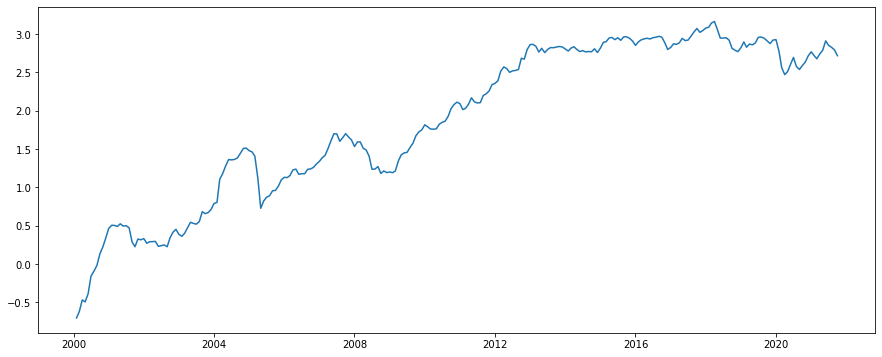

In [187]:
indexedDataSet_logScale = np.log(y)
plt.plot(indexedDataSet_logScale)

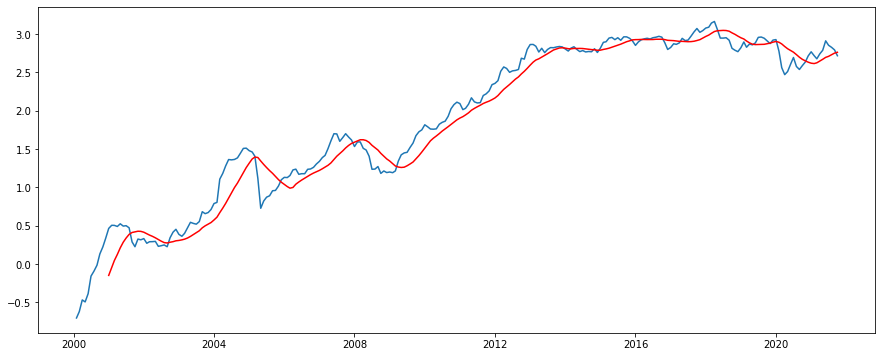

In [188]:
movingAverage = indexedDataSet_logScale.rolling(window=12).mean()
movingStd = indexedDataSet_logScale.rolling(window=12).std()
plt.plot(indexedDataSet_logScale)
plt.plot(movingAverage, color='red')

In [189]:
datasetLogScaleMinusMovingAverage = indexedDataSet_logScale - movingAverage
datasetLogScaleMinusMovingAverage.head()

Date
2000-02-01   NaN
2000-03-01   NaN
2000-04-01   NaN
2000-05-01   NaN
2000-06-01   NaN
Name: Avg, dtype: float64

In [192]:
datasetLogScaleMinusMovingAverage.dropna(inplace=True) #remover os valores ausentes
datasetLogScaleMinusMovingAverage.head()

Date
2001-01-01    0.613028
2001-02-01    0.552896
2001-03-01    0.458162
2001-04-01    0.364237
2001-05-01    0.314078
Name: Avg, dtype: float64

In [193]:
adf_test(datasetLogScaleMinusMovingAverage)

Resultado do teste de Dick-Fuller:
Teste                -5.723917e+00
Valor P               6.840625e-07
# de lags             5.000000e+00
# de observações      2.440000e+02
Valor crítico(1%)    -3.457438e+00
Valor crítico(5%)    -2.873459e+00
Valor crítico(10%)   -2.573122e+00
dtype: float64


In [194]:
#list_df[0].head(2).round(2).sort_values(ascending=True, by='High' )

In [ ]:
result = seasonal_decompose(datasetLogScaleMinusMovingAverage, freq=12, model='aditive')
result.plot()
plt.show()

C:\Users\DAGOBE~1\AppData\Local\Temp/ipykernel_5776/157007606.py:1: FutureWarning: the 'freq'' keyword is deprecated, use 'period' instead
  result = seasonal_decompose(datasetLogScaleMinusMovingAverage, freq=12, model='aditive')


In [178]:
dfSTL = datasetLogScaleMinusMovingAverage

In [179]:
dfSTL = pd.DataFrame(dfSTL)
dfSTL.head()

,Avg
Date,
2017-10-01,0.048179
2017-11-01,-0.011714
2017-12-01,-0.083451
2018-01-01,-0.072873
2018-02-01,-0.048531


In [180]:
dfSTL.asfreq('MS')

,Avg
Date,
2017-10-01,0.048179
2017-11-01,-0.011714
2017-12-01,-0.083451
2018-01-01,-0.072873
2018-02-01,-0.048531
2018-03-01,-0.001278
2018-04-01,-0.061455
2018-05-01,-0.121528
2018-06-01,-0.185702


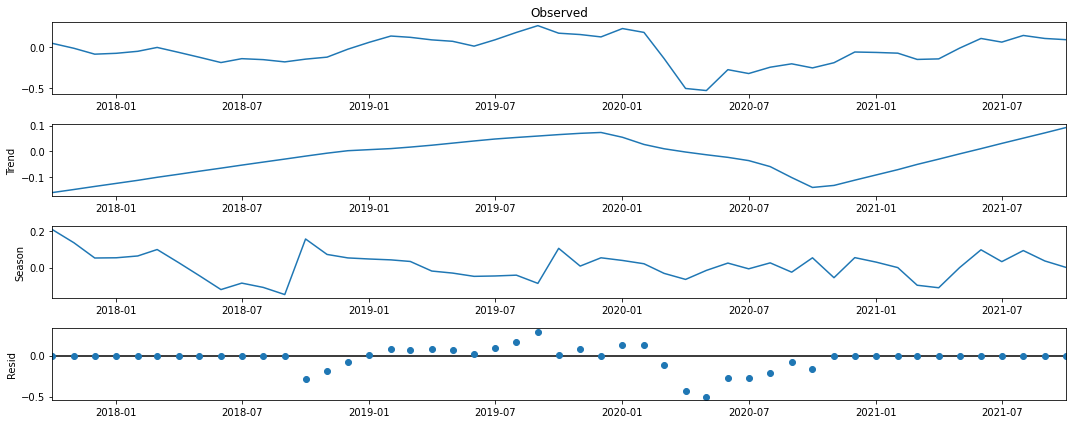

In [181]:
resultSTL = STL(dfSTL, robust=True, period=12).fit()
resultSTL.plot()
plt.show()

In [44]:
resultSTL.seasonal.to_excel('resultSTL.xlsx')

In [45]:
result.seasonal.to_excel('resultClassic.xlsx')